### dominates(objectiveVectorA,objectiveVectorB) — returns true if objectiveVectorA dominates objectiveVectorB, otherwise returns false

In [1]:
import matplotlib.pyplot as plt
def dominates(A,B):
    flag = False
    count = 0 
    if( len(A) == 2 and len(B) == 2):
        plt.scatter([A[0]],[A[-1]],label='A')
        plt.scatter([B[0]],[B[-1]],label='B')
        plt.xlabel('objective function 1')
        plt.ylabel('objective function 2')
        plt.legend()
    for i in range(0,len(A)):
        if(A[i]<B[i]):
            flag = True
            count = count +1
        elif(A[i]==B[i]):
            flag = True
        else:
            flag = False
            break
    if(flag == True and count >= 1):
        print('A dominates B')
    else:
        print('A does not Dominate B')

In [2]:
dominates([1,2,1],[1,2,3])

A dominates B


A dominates B


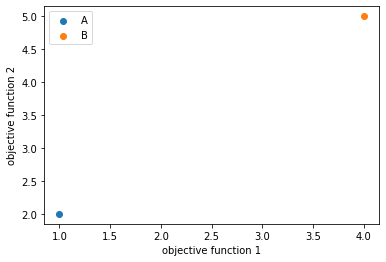

In [3]:
dominates([1,2],[4,5])

### weaklyDominates(objectiveVectorA,objectiveVectorB) — returns true if objectiveVectorA weakly dominates objectiveVectorB, otherwise returns false

In [4]:
import matplotlib.pyplot as plt
def weakly_dominates(A,B):
    flag = False
    if( len(A) == 2 and len(B) == 2):
        plt.scatter([A[0]],[A[-1]],label='A')
        plt.scatter([B[0]],[B[-1]],label='B')
        plt.xlabel('objective function 1')
        plt.ylabel('objective function 2')
        plt.legend()
    for i in range(0,len(A)):
        if(A[i] <= B[i]):
            flag = True
        else:
            flag = False
            break
    if(flag == True):
        print('A weakly dominates B')
    else:
        print('A weakly does not Dominate B')

A weakly dominates B


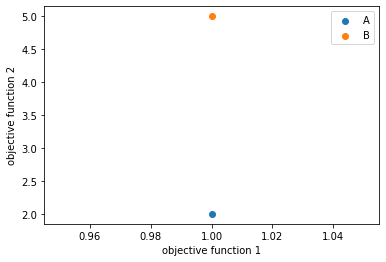

In [5]:
weakly_dominates([1,2],[1,5])

### strictlyDominates(objectiveVectorA,objectiveVectorB) — returns true if objectiveVectorA strictly dominates objectiveVectorB, otherwise returns false

In [6]:
import matplotlib.pyplot as plt
def strictly_dominates(A,B):
    flag = False
    count = 0
    if( len(A) == 2 and len(B) == 2):
        plt.scatter([A[0]],[A[-1]],label='A')
        plt.scatter([B[0]],[B[-1]],label='B')
        plt.xlabel('objective function 1')
        plt.ylabel('objective function 2')
        plt.legend()
    for i in range(0,len(A)):
        if(A[i] < B[i]):
            flag = True
            count = count + 1
        else:
            flag = False
            break
    if(flag == True and count == len(A)):
        print('A strictly dominates B')
    else:
        print('A does not strictly Dominate B')

In [30]:
import matplotlib.pyplot as plt
def strictly_dominates_Flag(A,B):
    flag = False
    count = 0
    for i in range(0,len(A)):
        if(A[i] < B[i]):
            flag = True
            count = count + 1
        else:
            flag = False
            break
    if(flag == True and count == len(A)):
        return True
    else:
        return False

A does not strictly Dominate B


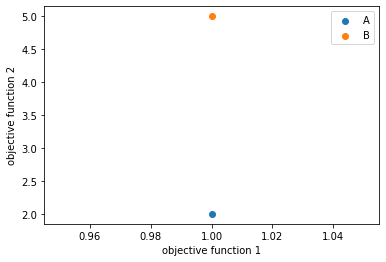

In [7]:
strictly_dominates([1,2],[1,5])

### getNondominatedIndices(arrayOfObjectiveVectors) — returns an array holding the indices of the non-dominated members of arrayOfObjectiveVectors

In [8]:
import matplotlib.pyplot as plt
def weakly_dominates_Flag(A,B):
    flag = False
    for i in range(0,len(A)):
        if(A[i] <= B[i]):
            flag = True
        else:
            flag = False
            break
    if(flag == True):
        return True
    else:
        return False


def dominates_Flag(A,B):
    flag = False
    count = 0 
    for i in range(0,len(A)):
        if(A[i]<B[i]):
            flag = True
            count = count +1
        elif(A[i]==B[i]):
            flag = True
        else:
            flag = False
            break
    if(flag == True and count >= 1):
        return True
    else:
        return False


# based on the question this only returns indices of elements that are not dominated by any other elements in the array of objective vectors
def getNonDominatedIndices(A):
    indices = []
    Flag = False
    count = 1
    for i in A:
        for j in A:
            if(i == j):
                continue
            else:
                print('Evaluation Number : {0} {1} , {2}'.format(count,i,j))
                count = count + 1
                if((dominates_Flag(j,i) == False and weakly_dominates_Flag(j,i) == False) ):
                    Flag = True
                else:
                    Flag = False
                    break
        
        if(Flag == True):
            mutual_index = []
            mutual_index.append(A.index(i))
            indices.append(mutual_index)


    return indices

In [9]:
getNonDominatedIndices([[1,6,3],[1,4,5]])

Evaluation Number : 1 [1, 6, 3] , [1, 4, 5]
Evaluation Number : 2 [1, 4, 5] , [1, 6, 3]


[[0], [1]]

### getIdeal(arrayOfObjectiveVectors) — returns the ‘ideal’ objective vector derived from an array of objective vectors, that is the vector holding the minimum observed value for each objective

In [10]:
def getNonDominatedIndices_Flag(A):
    indices = []
    Flag = False
    for i in A:
        for j in A:
            if(i == j):
                continue
            else:                
                if((dominates_Flag(j,i) == False and weakly_dominates_Flag(j,i) == False) ):
                    mutual_index = []
                    mutual_index.append(A.index(i))
                    mutual_index.append(A.index(j))
                    indices.append(mutual_index)
                else:
                    return False
                
    if(len(indices)>=1):
        return True
    else:
        return False




def getIdeal(A):
    indices = []
    Flag = False
    for i in A:
        for j in A:
            if(i == j):
                continue
            elif(getNonDominatedIndices_Flag([i,j]) == True):
                continue
                
            else:                
                if((dominates_Flag(i,j) == True or weakly_dominates_Flag(i,j) == True)):
                    Flag = True
                else:
                    Flag = False
                    break
                    
        if(Flag == True):
            indices.append(i)
            
                    
    return indices
    

In [11]:
getIdeal([[1,6,3],[1,4,5],[1,2,3]])

[[1, 2, 3]]

### getNumberDominating(arrayOfObjectiveVectors) — returns an array holding the number of members of arrayOfObjectiveVectors which dominate the corresponding element in the array. I.e. if the nth member of arrayOfObjectiveVectors is dominated by 5 members of arrayOfObjectiveVectors, then the integer array returned by the function should hold the value of 5 in its nth element.


In [12]:
def getNumberDominating(A):
    count = 0
    n_dominating = []
    for i in A:
        for j in A:
            if(i == j):
                continue
            if(dominates_Flag(j,i) == True):
                count = count + 1
        n_dominating.append(count)
        count = 0
    
    return n_dominating
            

In [13]:
getNumberDominating([[1,2,3],[4,5,6],[7,9,0],[6,4,5]])

[0, 1, 0, 1]

##### Verification of Solutions using Invariants

* If the kth value of the returned array is 0, as provided by getNumberDominating(Y), then k must be in the array returned by getNondominatedIndices(Y).


In [14]:
print(getNumberDominating([[1,2,3],[4,5,6],[7,9,0],[6,4,5]]))
print(getNonDominatedIndices([[1,2,3],[4,5,6],[7,9,0],[6,4,5]]))

[0, 1, 0, 1]
Evaluation Number : 1 [1, 2, 3] , [4, 5, 6]
Evaluation Number : 2 [1, 2, 3] , [7, 9, 0]
Evaluation Number : 3 [1, 2, 3] , [6, 4, 5]
Evaluation Number : 4 [4, 5, 6] , [1, 2, 3]
Evaluation Number : 5 [7, 9, 0] , [1, 2, 3]
Evaluation Number : 6 [7, 9, 0] , [4, 5, 6]
Evaluation Number : 7 [7, 9, 0] , [6, 4, 5]
Evaluation Number : 8 [6, 4, 5] , [1, 2, 3]
[[0], [2]]


* If strictlyDominates(a,b), then dominates(a,b) and weaklyDominates(a,b).
* If dominates(a,b) then weaklyDominates(a,b).


In [15]:
print(strictly_dominates([1,2,3],[4,5,6]))
print(dominates([1,2,3],[4,5,6]))
print(weakly_dominates([1,2,3],[4,5,6]))

A strictly dominates B
None
A dominates B
None
A weakly dominates B
None


* Calling dominates(a,b) on all pair combinations of the elements of Y identified in the array returned by getNondominatedIndices(Y) should return false.


In [16]:
A = [[1,2,3],[4,5,6],[7,9,0],[6,4,5]]
for i in A:
    for j in A:
        if(i==j):
            continue
        else:
            print('{0} and {1} calling dominates returns {2}'.format(i,j,dominates_Flag(i,j)))

[1, 2, 3] and [4, 5, 6] calling dominates returns True
[1, 2, 3] and [7, 9, 0] calling dominates returns False
[1, 2, 3] and [6, 4, 5] calling dominates returns True
[4, 5, 6] and [1, 2, 3] calling dominates returns False
[4, 5, 6] and [7, 9, 0] calling dominates returns False
[4, 5, 6] and [6, 4, 5] calling dominates returns False
[7, 9, 0] and [1, 2, 3] calling dominates returns False
[7, 9, 0] and [4, 5, 6] calling dominates returns False
[7, 9, 0] and [6, 4, 5] calling dominates returns False
[6, 4, 5] and [1, 2, 3] calling dominates returns False
[6, 4, 5] and [4, 5, 6] calling dominates returns False
[6, 4, 5] and [7, 9, 0] calling dominates returns False


In [17]:
import pandas as pd
dataset_1 = pd.read_csv('workshop1_test_data_1.csv')
dataset_2 = pd.read_csv('workshop1_test_data_2.csv')


In [18]:
dataset_1.head()

,-1.30768829630527,-0.600326562133734,0.515246335524849
0,-0.433592,0.489965,0.261406
1,0.342624,0.739363,-0.941486
2,3.578397,1.711888,-0.162338
3,2.769437,-0.194124,-0.146055
4,-1.349887,-2.138355,-0.532011


In [19]:
dataset_2.head()

,-6,2
0,5,12
1,2,-2
2,9,13
3,6,5
4,9,12


In [20]:
total_rows = []
each_row = []
columns = dataset_1.columns.to_list()
header = []
for i in columns:
    header.append(float(i))
total_rows.append(header)
for i in range(0,len(dataset_1)):
    each_row = dataset_1.iloc[i].to_list()
    total_rows.append(each_row)
    each_row = []
total_rows

[[-1.30768829630527, -0.600326562133734, 0.515246335524849],
 [-0.433592022305684, 0.489965321173948, 0.261406324055383],
 [0.34262446653865, 0.739363123604474, -0.941485770955434],
 [3.57839693972576, 1.71188778298155, -0.162337672803828],
 [2.76943702988488, -0.194123535758265, -0.146054634331526],
 [-1.34988694015652, -2.13835526943994, -0.532011376808821],
 [3.03492346633185, -0.839588747336614, 1.68210359466318],
 [0.725404224946106, 1.35459432800464, -0.875729346160017],
 [-0.0630548731896562, -1.07215528838425, -0.483815050110121],
 [0.714742903826096, 0.960953869740567, -0.712004549027422],
 [-0.204966058299775, 0.124049800003193, -1.17421233145682],
 [-0.124144348216312, 1.43669662271894, -0.192239517539275],
 [1.48969760778546, -1.96089999936503, -0.274070229932602],
 [1.40903448980048, -0.19769822597415, 1.5300725144241],
 [1.41719241342961, -1.2078454852598, -0.249024742513714],
 [0.67149713360808, 2.90800803072936, -1.06421341288933],
 [-1.20748692268504, 0.825218894228491

In [21]:
len(total_rows)

100

In [22]:
getNonDominatedIndices(total_rows)

Evaluation Number : 1 [-1.30768829630527, -0.600326562133734, 0.515246335524849] , [-0.433592022305684, 0.489965321173948, 0.261406324055383]
Evaluation Number : 2 [-1.30768829630527, -0.600326562133734, 0.515246335524849] , [0.34262446653865, 0.739363123604474, -0.941485770955434]
Evaluation Number : 3 [-1.30768829630527, -0.600326562133734, 0.515246335524849] , [3.57839693972576, 1.71188778298155, -0.162337672803828]
Evaluation Number : 4 [-1.30768829630527, -0.600326562133734, 0.515246335524849] , [2.76943702988488, -0.194123535758265, -0.146054634331526]
Evaluation Number : 5 [-1.30768829630527, -0.600326562133734, 0.515246335524849] , [-1.34988694015652, -2.13835526943994, -0.532011376808821]
Evaluation Number : 6 [-0.433592022305684, 0.489965321173948, 0.261406324055383] , [-1.30768829630527, -0.600326562133734, 0.515246335524849]
Evaluation Number : 7 [-0.433592022305684, 0.489965321173948, 0.261406324055383] , [0.34262446653865, 0.739363123604474, -0.941485770955434]
Evaluation

[[5],
 [26],
 [27],
 [29],
 [32],
 [34],
 [40],
 [56],
 [61],
 [62],
 [66],
 [71],
 [84],
 [86],
 [93],
 [94],
 [96]]

In [23]:
# to verify the above soln I am calling getNumberDominating where the indices with value zero should be the same as the indices returned here
values = getNumberDominating(total_rows)
indices = []
for i in range(0,len(values)):
    if(values[i]==0):
        indices.append(i)
indices

[5, 26, 27, 29, 32, 34, 40, 56, 61, 62, 66, 71, 84, 86, 93, 94, 96]

In [24]:
# Same for DataSet 2
total_rows = []
each_row = []
columns = dataset_2.columns.to_list()
header = []
for i in columns:
    header.append(int(i))
total_rows.append(header)
for i in range(0,len(dataset_2)):
    each_row = dataset_2.iloc[i].to_list()
    total_rows.append(each_row)
    each_row = []
total_rows


[[-6, 2],
 [5, 12],
 [2, -2],
 [9, 13],
 [6, 5],
 [9, 12],
 [-1, 2],
 [-1, -6],
 [11, -14],
 [-21, 2],
 [-5, 9],
 [-12, -2],
 [-3, -5],
 [7, -3],
 [9, -10],
 [-10, -4],
 [-4, -1],
 [2, 1],
 [-2, 0],
 [4, 7],
 [4, 2],
 [-9, 19],
 [-1, 4],
 [-21, 19],
 [12, -7],
 [-6, 6],
 [-12, -2],
 [-2, 7],
 [-14, 6],
 [0, -21],
 [-5, -13],
 [22, -14],
 [12, 5],
 [-24, 15],
 [5, -3],
 [-13, 9],
 [-2, 6],
 [2, -10],
 [8, 4],
 [-2, -7],
 [16, 16],
 [-4, 0],
 [4, 17],
 [7, -4],
 [1, 6],
 [9, 0],
 [4, -20],
 [-7, -9],
 [-18, 7],
 [19, 0],
 [-6, -11],
 [2, -6],
 [6, 3],
 [2, -9],
 [-9, 10],
 [-4, -6],
 [-1, 19],
 [15, -10],
 [-8, 2],
 [8, -15],
 [4, -7],
 [-2, -5],
 [-10, 5],
 [-2, 10],
 [0, 4],
 [-14, -3],
 [2, 9],
 [-8, 8],
 [0, 2],
 [4, 6],
 [-9, 5],
 [-2, -9],
 [4, 8],
 [-18, -6],
 [11, -6],
 [25, 2],
 [10, -3],
 [-3, -1],
 [5, 6],
 [-10, 11],
 [19, -1],
 [10, 4],
 [8, -2],
 [-8, 3],
 [4, 5],
 [-5, -6],
 [-3, 3],
 [-5, 7],
 [-10, 1],
 [-9, 18],
 [-2, -6],
 [-16, -7],
 [7, -17],
 [-1, 10],
 [7, 9],
 [3,

In [25]:
len(total_rows)
total_rows[1][0]

5

In [26]:
getNonDominatedIndices(total_rows)

Evaluation Number : 1 [-6, 2] , [5, 12]
Evaluation Number : 2 [-6, 2] , [2, -2]
Evaluation Number : 3 [-6, 2] , [9, 13]
Evaluation Number : 4 [-6, 2] , [6, 5]
Evaluation Number : 5 [-6, 2] , [9, 12]
Evaluation Number : 6 [-6, 2] , [-1, 2]
Evaluation Number : 7 [-6, 2] , [-1, -6]
Evaluation Number : 8 [-6, 2] , [11, -14]
Evaluation Number : 9 [-6, 2] , [-21, 2]
Evaluation Number : 10 [5, 12] , [-6, 2]
Evaluation Number : 11 [2, -2] , [-6, 2]
Evaluation Number : 12 [2, -2] , [5, 12]
Evaluation Number : 13 [2, -2] , [9, 13]
Evaluation Number : 14 [2, -2] , [6, 5]
Evaluation Number : 15 [2, -2] , [9, 12]
Evaluation Number : 16 [2, -2] , [-1, 2]
Evaluation Number : 17 [2, -2] , [-1, -6]
Evaluation Number : 18 [9, 13] , [-6, 2]
Evaluation Number : 19 [6, 5] , [-6, 2]
Evaluation Number : 20 [9, 12] , [-6, 2]
Evaluation Number : 21 [-1, 2] , [-6, 2]
Evaluation Number : 22 [-1, -6] , [-6, 2]
Evaluation Number : 23 [-1, -6] , [5, 12]
Evaluation Number : 24 [-1, -6] , [2, -2]
Evaluation Number : 

[[9], [29], [30], [33], [47], [50], [73], [91]]

In [27]:
# to verify the above soln I am calling getNumberDominating where the indices with value zero should be the same as the indices returned here
values = getNumberDominating(total_rows)
indices = []
for i in range(0,len(values)):
    if(values[i]==0):
        indices.append(i)
indices

[9, 29, 30, 33, 47, 50, 73, 91]

#### dominates(arrayOfObjectiveVectorsA,arrayOfObjectiveVectorsB) — returns true if arrayOfObjectiveVectorsA dominates arrayOfObjectiveVectorsB, otherwise returns false

* According to the principle of domination between a set of solutions , If set A dominates another set B then every element of set B has to be dominated by atleast one element of set A

In [28]:
def dominates_set_comparison(A,B):
    for i in B:
        count = 0
        for j in A:
            if(dominates_Flag(j,i) == True):
                count = count + 1
        if(count >= 1):
            continue
        else:
            return False
    return True

In [29]:
def weakly_dominates_set_comparison(A,B):
    for i in B:
        count = 0
        for j in A:
            if(weakly_dominates_Flag(j,i) == True):
                count = count + 1
        if(count >= 1):
            continue
        else:
            return False
    return True

In [31]:
def strictly_dominates_set_comparison(A,B):
    for i in B:
        count = 0
        for j in A:
            if(strictly_dominates_Flag(j,i) == True):
                count = count + 1
        if(count >= 1):
            continue
        else:
            return False
    return True

In [34]:
def better_set_comparison(A,B):
    
    if(A != B):
        for i in B:
            count = 0
            for j in A:
                if(weakly_dominates_Flag(j,i) == True):
                    count = count + 1
            if(count >= 1):
                continue
            else:
                return False
        return True
    else:
        return False